In [3]:
# coding: utf-8
# from IPython.parallel import Client
# rc=Client()
import pandas as pd
pd.options.display.max_rows = 10000
import start_up




# for wide terminal display of pandas dataframes
# pd.options.display.width = 120
# pd.options.display.max_rows = 10000
# from IPython import get_ipython

# plot inline
# get_ipython().magic('pylab inline')
# IPython.get_ipython().magic('matplotlib inline')

# plt.rcParams['figure.figsize'] = 14, 6

directory = '~/Documents/workspace/data_analysis/'
csv_file = 'data/park345_oa_temp.csv'
title = 'Accumulated Steam Usage'

# load dataframe, and subset out relevant columns
park_data = pd.read_csv(directory + csv_file, error_bad_lines=False)
park_data.columns = ['ID', 'TIMESTAMP',
                     'TRENDFLAGS', 'STATUS',
                     'VALUE', 'TRENDFLAGS_TAG',
                     'STATUS_TAG']
park_data = park_data.sort('TIMESTAMP')

# TODO Note that lags necessary for season stationarity>100 w-out log transform
# is over 100 for non-log-ratio transformed original data, and 0
# for log-ratio transformed

# construct time series, getting rid of microseconds
park_ts = pd.Series(list(park_data.VALUE),
                    pd.DatetimeIndex(park_data.TIMESTAMP),
                    name=title)

b'Skipping line 29979: expected 7 fields, saw 8\n'


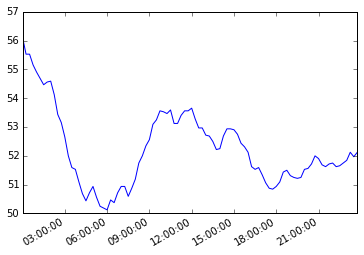

In [8]:
%matplotlib inline
park_ts['2013-04-18'].plot()    

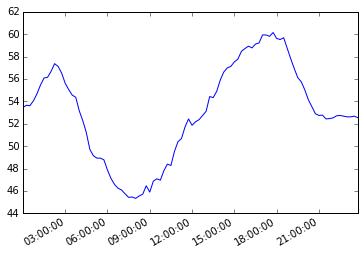

In [9]:
park_ts['2013-04-25'].plot()  

In [12]:
park_ts['2013-04-25']

2013-04-25 00:00:00.217    53.469002
2013-04-25 00:15:01.200    53.655998
2013-04-25 00:30:01.197    53.625000
2013-04-25 00:45:00.187    54.063000
2013-04-25 01:00:00.200    54.688000
2013-04-25 01:15:00.193    55.469002
2013-04-25 01:30:01.177    56.094002
2013-04-25 01:45:00.247    56.155998
2013-04-25 02:00:00.233    56.688000
2013-04-25 02:15:00.190    57.375000
2013-04-25 02:30:00.213    57.125000
2013-04-25 02:45:00.210    56.530998
2013-04-25 03:00:00.243    55.625000
2013-04-25 03:15:00.213    55.063000
2013-04-25 03:30:01.237    54.563000
2013-04-25 03:45:00.217    54.375000
2013-04-25 04:00:00.207    53.155998
2013-04-25 04:15:00.207    52.280998
2013-04-25 04:30:00.217    51.219002
2013-04-25 04:45:00.227    49.719002
2013-04-25 05:00:01.217    49.155998
2013-04-25 05:15:00.223    48.938000
2013-04-25 05:30:00.257    48.938000
2013-04-25 05:45:00.243    48.780998
2013-04-25 06:00:00.227    47.875000
2013-04-25 06:15:01.230    47.125000
2013-04-25 06:30:00.207    46.594002
2

20:30 and 22:30 repetition--repetitions don't necessarily occur next to each other--so dropping duplicates in time series and interpolating won't work, and will skew data 

In [11]:
park_ts['2013-04-18']

2013-04-18 00:00:00.117    56.125000
2013-04-18 00:15:00.207    55.530998
2013-04-18 00:30:00.133    55.530998
2013-04-18 00:45:00.200    55.155998
2013-04-18 01:00:00.117    54.905998
2013-04-18 01:15:00.210    54.688000
2013-04-18 01:30:00.120    54.469002
2013-04-18 01:45:00.217    54.563000
2013-04-18 02:00:00.120    54.594002
2013-04-18 02:15:00.210    54.125000
2013-04-18 02:30:00.117    53.438000
2013-04-18 02:45:00.153    53.155998
2013-04-18 03:00:00.110    52.655998
2013-04-18 03:15:00.180    52.000000
2013-04-18 03:30:00.127    51.594002
2013-04-18 03:45:00.200    51.530998
2013-04-18 04:00:00.133    51.094002
2013-04-18 04:15:00.170    50.688000
2013-04-18 04:30:00.133    50.438000
2013-04-18 04:45:00.153    50.719002
2013-04-18 05:00:00.117    50.938000
2013-04-18 05:15:00.203    50.563000
2013-04-18 05:30:00.117    50.250000
2013-04-18 05:45:00.207    50.188000
2013-04-18 06:00:01.127    50.125000
2013-04-18 06:15:00.187    50.469002
2013-04-18 06:30:00.140    50.375000
2

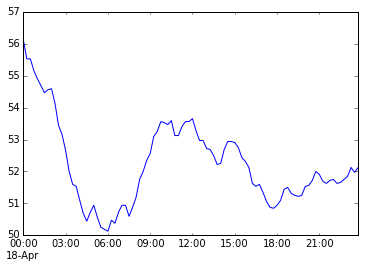

In [14]:
park_ts['2013-04-18'].resample('15Min').interpolate().plot()

How can I tell start-up time from this data?

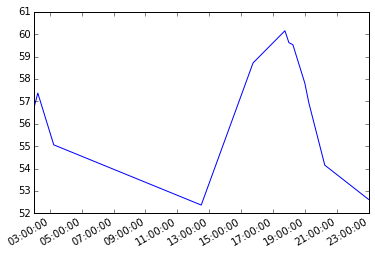

In [20]:
park_ts.drop_duplicates().interpolate()['2013-04-25'].plot()

In [21]:
park_ts['2013-04-25'].duplicated()

2013-04-25 00:00:00.217    False
2013-04-25 00:15:01.200    False
2013-04-25 00:30:01.197    False
2013-04-25 00:45:00.187    False
2013-04-25 01:00:00.200    False
2013-04-25 01:15:00.193    False
2013-04-25 01:30:01.177    False
2013-04-25 01:45:00.247    False
2013-04-25 02:00:00.233    False
2013-04-25 02:15:00.190    False
2013-04-25 02:30:00.213    False
2013-04-25 02:45:00.210    False
2013-04-25 03:00:00.243    False
2013-04-25 03:15:00.213    False
2013-04-25 03:30:01.237    False
2013-04-25 03:45:00.217    False
2013-04-25 04:00:00.207    False
2013-04-25 04:15:00.207    False
2013-04-25 04:30:00.217    False
2013-04-25 04:45:00.227    False
2013-04-25 05:00:01.217    False
2013-04-25 05:15:00.223    False
2013-04-25 05:30:00.257     True
2013-04-25 05:45:00.243    False
2013-04-25 06:00:00.227    False
2013-04-25 06:15:01.230    False
2013-04-25 06:30:00.207    False
2013-04-25 06:45:00.187    False
2013-04-25 07:00:00.203    False
2013-04-25 07:15:00.210    False
2013-04-25